# FINAL DRAFT OF THIS 
Inputs: cdom files 
outputs: wavelenths.csv, plot.png, outputs.csv
    
    redesinge from inputs 
    
    Hanna Bridgham 
    last edited 11/17/2022

## PART 1: QA/QC

Loading data and checking for issues 

In [1]:
#LOAD REQUIERD PACKAGES 
import os # OS library
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names

from scipy.interpolate import PchipInterpolator # Interpolator
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import minimize

In [3]:
files = glob.glob('../../../../Desktop/CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16/*.txt')
pathlength = .5
psu = 1
ylimmin = -1
ylimmax = 2
files.sort()
print('I have your files')
files

I have your files


['../../../../Desktop/CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16\\BBL_RHZ_MIXED_time_Absorbance__0__02-08-34-340.txt',
 '../../../../Desktop/CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16\\BBL_RHZ_MIXED_time_Absorbance__0__02-09-18-331.txt',
 '../../../../Desktop/CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16\\BBL_RHZ_MIXED_time_Absorbance__10__02-14-18-507.txt',
 '../../../../Desktop/CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16\\BBL_RHZ_MIXED_time_Absorbance__11__02-14-48-562.txt',
 '../../../../Desktop/CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16\\BBL_RHZ_MIXED_time_Absorbance__12__02-15-18-349.txt',
 '../../../../Desktop/CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16\\BBL_RHZ_MIXED_time_Absorbance__13__02-15-48-396.txt',
 '../../../../Desktop/CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16\\BBL_RHZ_MIXED_time_Absorbance__14__02-16-18-456.txt',
 '../../../../Desktop/CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16\\BBL_RHZ_MIXED_time_Absorbance__15__02-16-48-490.txt',
 '../../../../Desktop/CDOM_DATA/GO

In [4]:
# REMOVE THIS CELL ONE YOU GET IT
ID = os.path.basename(files[-1])[:-4].split("_")
ID

['RHZ_innital_Absorbance__0__01-36-43-937']

In [10]:
#LOAD FILE
def open_files(name):
    # reads individual scan files
    df = pd.read_table(name, skiprows=16,names=['wl', 'abs'], index_col='wl')
    # extract ID from filename
    ID = os.path.basename(name)[:-4].split("_")
    ID.pop(3)
    ID = '_'.join(list(filter(None, ID)))
    # rename col name with ID
    df = df.rename(columns={'abs': ID})
    return df

#LOOP TRU FILES TO MAKE ONE EASY TO USE DATA FRAME 
#columns are scanns and rows are wavelths 

frames = [open_files(f) for f in files]
df = pd.concat(frames, axis=1) # joins along cols  

print("files loaded :)")

files loaded :)


In [11]:
# TEST CODE 

df_noCorr = df 
df

,BBL_RHZ_MIXED_Absorbance_0_02-08-34-340,BBL_RHZ_MIXED_Absorbance_0_02-09-18-331,BBL_RHZ_MIXED_Absorbance_10_02-14-18-507,BBL_RHZ_MIXED_Absorbance_11_02-14-48-562,BBL_RHZ_MIXED_Absorbance_12_02-15-18-349,BBL_RHZ_MIXED_Absorbance_13_02-15-48-396,BBL_RHZ_MIXED_Absorbance_14_02-16-18-456,BBL_RHZ_MIXED_Absorbance_15_02-16-48-490,BBL_RHZ_MIXED_Absorbance_16_02-17-18-513,BBL_RHZ_MIXED_Absorbance_17_02-17-48-556,...,BBL_RHZ_MIXED_Absorbance_7_02-12-48-402,BBL_RHZ_MIXED_Absorbance_8_02-13-18-460,BBL_RHZ_MIXED_Absorbance_9_02-13-48-497,BBL_RHZ_MIX_Absorbance_0_01-57-42-534,BBL_RHZ_MIX_Absorbance_0_02-06-47-428,BBL_RHZ_MIX_Absorbance_1_01-58-12-575,BBL_RHZ_MIX_Absorbance_2_01-58-42-352,BBL_RHZ_MIX_Absorbance_3_01-59-12-383,BBL_innital_Absorbance_1_01-48-25-438,RHZ_innital_Absorbance_0_01-36-43-937
wl,,,,,,,,,,,,,,,,,,,,,
190.0441,-0.4061,-0.3331,-0.3847,-0.4747,-0.4907,-0.5424,-0.4806,-0.5445,-0.3084,-0.5043,...,-0.5025,-0.4287,-0.4564,0.5046,-0.2543,-0.1010,-0.2271,-0.1771,-0.5265,1.3782
190.4264,-0.7921,-1.0185,-1.1475,-1.1805,-1.2371,-1.1710,-1.2891,-1.1240,-1.3048,-1.2891,...,-1.0345,-1.1780,-1.1568,-0.6797,-1.0954,-0.9468,-0.9447,-0.9182,0.2814,-0.7128
190.8087,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,...,-0.0000,-0.0000,-0.0000,-0.8277,-0.0000,-0.0000,-0.0000,-0.3324,-0.0704,-0.3164
191.1909,-0.2792,-0.3518,-0.4544,-0.2611,-0.4500,-0.4201,-0.5054,-0.4588,-0.4959,-0.5739,...,-0.2283,-0.4032,-0.4500,0.0901,-0.3692,-0.2922,-0.2583,-0.2686,0.0855,-0.0000
191.5730,-0.3937,-0.2286,-0.4142,-0.3010,-0.4314,-0.4002,-0.2751,-0.4588,-0.4543,-0.5145,...,-0.4820,-0.2465,-0.3989,0.3437,-0.3436,-0.3714,-0.0112,-0.1646,-0.1048,-0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880.5978,0.0499,0.0309,0.0425,0.0112,0.0572,-0.0142,0.0120,-0.0084,0.0544,0.0473,...,0.0323,0.0568,0.0039,0.0554,0.0500,0.0652,0.0842,0.0328,0.1156,0.0860
880.8884,0.1013,0.1243,0.0550,0.0529,0.0558,0.0642,0.0464,0.0543,0.0637,0.0450,...,0.0700,0.0447,0.0718,0.1772,0.0500,0.0823,0.1345,0.1066,0.1444,0.0916
881.1790,0.0527,0.0968,-0.0033,0.0236,0.0035,0.0206,0.0003,-0.0004,0.0232,0.0365,...,0.0106,0.0103,0.0224,0.0782,0.0757,0.0167,0.1040,0.0351,0.1496,0.0756


# define functions to be applied based on header info
def edark_fun(df, integration_time, scans_to_average):
    electric_dark_spectrum = (1 / integration_time) * (1 / scans_to_average)
    raw_spectrum = df
    corrected_spectrum = raw_spectrum - electric_dark_spectrum
    df = corrected_spectrum
    return df

def lin_cor_FLMS12623(df):
    # perform nonlinearity correction for spectrometer FLMS12623
    return df

def lin_cor_FLMS02459(df):
    # perform nonlinearity correction for spectrometer FLMS02459
    return df

#do the thing 

# initialize variables
spectrometer = None
edark = False
non_lin = False

# loop through files and apply functions based on header info
def open_files_corr(name):
    # reads individual scan files
    with open(name, 'r') as f:
        # read header
        header = f.read().splitlines()[:14]
        # extract integration time and scans to average
        integration_time = float(header[6].split(': ')[1])
        scans_to_average = int(header[7].split(': ')[1])
        # extract ID from filename
        ID = os.path.basename(name)[:-4].split("_")
        ID.pop(1)
        ID = '_'.join(list(filter(None, ID)))
        # read data
        df = pd.read_table(name, skiprows=14, names=['wl', 'abs'], index_col='wl')
        # apply electric dark correction
        if 'false' in header[8].split(': ')[1].lower():
            df = edark_fun(df, integration_time, scans_to_average)
        # apply linearity correction
        if 'false' in header[9].split(': ')[1].lower():
            if 'FLMS12623' in header[4].split(': ')[1]:
                df = lin_cor_FLMS12623(df)
            elif 'FLMS02459' in header[4].split(': ')[1]:
                df = lin_cor_FLMS02459(df)
        # rename col name with ID
        df = df.rename(columns={'abs': ID})
        return df
    
# concatenate frames into one data frame

frames = [open_files_corr(f) for f in files]
df = pd.concat(frames, axis=1) # joins along cols  

df

graph showing the cdom Absortion data


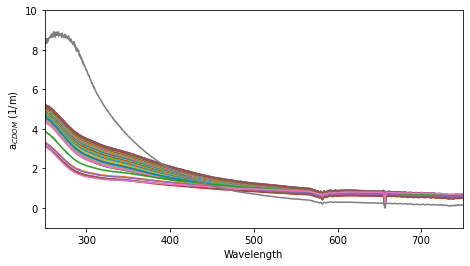

In [12]:
#Absorbance to Absortion
df_clean = df
df_cl = df_clean*(2.303/pathlength) # to avoid overwriting when reruning the cell
df_cl

#make a plot to make sure nothing is too crazy 

fig, ax = plt.subplots(figsize=(7.5,4))
df_cl.plot(ax=ax, legend=None)
ax.set_ylim(ylimmin,10)
ax.set_xlim(250,750)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
print('graph showing the cdom Absortion data')

### Salinity correction

the interproated data set for each scan is created
the mean data set for each sample is created
the transpose data set is created
see the graphs


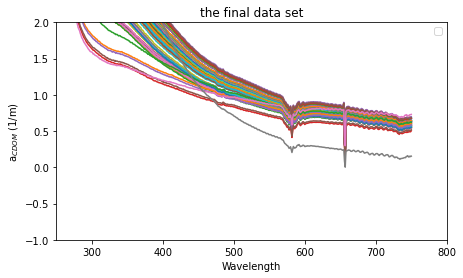

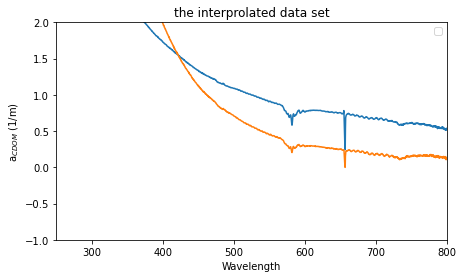

In [13]:
#HERE WE MAKE A COPY INTERPROLATED DATA SET
df_final = df_cl
x = df_final.index
coln = np.arange(0, len(df_final.columns), 1, dtype=int)

Frames = []
frames = []

for col in coln:
    y = df_final.iloc[:,col]
    pchip_col = PchipInterpolator(x, y, axis=1)
    xi = np.arange(250,751,1)
    yi = pchip_col(xi)
    d = {'abs': yi}
    pchip_c = pd.DataFrame(d, index = xi)
    Frames.append(pchip_c)

df_pchip = pd.concat(Frames, axis=1, ignore_index=False)
New_Labels = df_final.columns
df_pchip.columns = New_Labels
print("the interproated data set for each scan is created")

#HERE WE MAKE A MEAN DATA SET FOR EACH SAMPLE
names = [name[0] for name in df_pchip.columns.str.rsplit('_')]
df_mean = df_final.groupby(names, axis=1).mean()
df_mean
print("the mean data set for each sample is created")

#HERE WE MAKE A COPY OF THE DATA THAT IS VERTICAL SO JB LIKES IT
abs_data = df_mean.transpose(copy=False)
print("the transpose data set is created")

fig, ax = plt.subplots(figsize=(7,4))
df_pchip.plot(label='', ax=ax)
ax.set_ylim(ylimmin,ylimmax)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("the final data set")
ax.legend("")

fig, ax = plt.subplots(figsize=(7,4))
df_mean.plot(label='', ax=ax)
ax.set_ylim(ylimmin,ylimmax)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("the interprolated data set")
ax.legend("")

print("see the graphs")

In [40]:
df_final = df_cl.T
df_final

wl,190.0441,190.4264,190.8087,191.1909,191.5730,191.9551,192.3372,192.7193,193.1013,193.4832,...,879.1439,879.4348,879.7256,880.0164,880.3071,880.5978,880.8884,881.1790,881.4695,881.7600
BBL_RHZ_MIXED_Absorbance_0_02-08-34-340,-1.870497,-3.648413,-0.000000,-1.285995,-1.813382,-6.043072,-1.092083,-0.000000,-1.253753,-3.561820,...,0.068169,0.028557,0.331171,0.263463,0.182398,0.229839,0.466588,0.242736,0.242736,0.242736
BBL_RHZ_MIXED_Absorbance_0_02-09-18-331,-1.534259,-4.691211,-0.000000,-1.620391,-1.052932,-4.844591,-1.295207,-0.000000,-1.553143,-2.805975,...,0.119295,0.303996,0.231221,0.199900,0.161671,0.142325,0.572526,0.445861,0.445861,0.445861
BBL_RHZ_MIXED_Absorbance_10_02-14-18-507,-1.771928,-5.285385,-0.000000,-2.092966,-1.907805,-3.493190,-0.912449,-0.000000,-1.613942,-2.106784,...,0.265306,0.200822,0.215561,0.145550,0.074617,0.195755,0.253330,-0.015200,-0.015200,-0.015200
BBL_RHZ_MIXED_Absorbance_11_02-14-48-562,-2.186468,-5.437383,-0.000000,-1.202627,-1.386406,-5.369214,-0.760451,-0.000000,-1.055695,-3.001730,...,0.266687,0.249645,0.301693,0.231682,0.186543,0.051587,0.243657,0.108702,0.108702,0.108702
BBL_RHZ_MIXED_Absorbance_12_02-15-18-349,-2.260164,-5.698083,-0.000000,-2.072700,-1.987028,-5.075351,-1.683954,-0.000000,-0.853492,-3.142674,...,0.008751,0.369862,-0.004145,0.109623,0.243197,0.263463,0.257015,0.016121,0.016121,0.016121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BBL_RHZ_MIX_Absorbance_1_01-58-12-575,-0.465206,-4.360961,-0.000000,-1.345873,-1.710668,-3.493190,-0.809735,-0.000000,-1.467932,-2.233449,...,0.109623,0.481327,0.329790,0.202203,0.373547,0.300311,0.379074,0.076920,0.076920,0.076920
BBL_RHZ_MIX_Absorbance_2_01-58-42-352,-1.046023,-4.351288,-0.000000,-1.189730,-0.051587,-0.000000,-0.878825,-0.000000,-1.040035,-2.605614,...,0.547653,0.684452,0.434346,0.349595,0.491000,0.387825,0.619507,0.479024,0.479024,0.479024
BBL_RHZ_MIX_Absorbance_3_01-59-12-383,-0.815723,-4.229229,-1.531034,-1.237172,-0.758148,0.560550,-0.666488,-0.000000,-0.968642,-1.021611,...,0.274518,0.562853,0.482248,0.432503,0.272215,0.151077,0.491000,0.161671,0.161671,0.161671
BBL_innital_Absorbance_1_01-48-25-438,-2.425059,1.296128,-0.324262,0.393813,-0.482709,0.496066,-0.432043,2.567845,-4.644230,0.140022,...,0.707482,0.413619,0.656355,0.889419,0.762754,0.532454,0.665106,0.689058,0.689058,0.689058


IndexError: index 66 is out of bounds for axis 0 with size 66

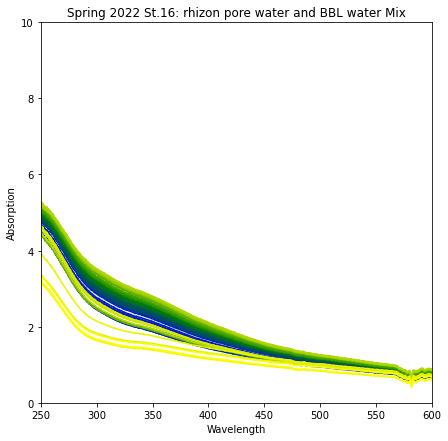

In [41]:
# Create a color gradient from blue to green to yellow
num_colors = df_final.index.size - 2  # Exclude the last two specific indices

# Create a smooth color gradient from blue to green to yellow
colors = np.concatenate([
    mcolors.LinearSegmentedColormap.from_list('blue_to_green', [(0, 'blue'),(.5, 'green'),(1, 'yellow')])(np.linspace(0, 1, num_colors))
])

# Set the color for the specific indices
#colors = np.append(colors, 'blue')  # Blue for the last index
#colors = np.append(colors, 'red')   # Red for the second last index

# Plotting
fig, ax = plt.subplots(figsize=(7,7))
for i, index in enumerate(df_final.index):
    if index == 'BBL_innital_1_01-48-25-438':
        color = 'blue'
    elif index == 'RHZ_innital_0_01-36-43-937':
        color = 'red'
    else:
        color = colors[i]
    ax.plot(df_final.columns, df_final.loc[index], color=color)

# Customize the plot
    ax.set_xlabel('Wavelength')
    ax.set_ylabel('Absorption')
    ax.set_title('Spring 2022 St.16: rhizon pore water and BBL water Mix')
    ax.set_ylim(0, 10)
    ax.set_xlim(250, 600)

plt.savefig("../../../Data_Thesis/FIGS/Experiments/MIX_16_Spring")
plt.show()



KeyError: 190.0441

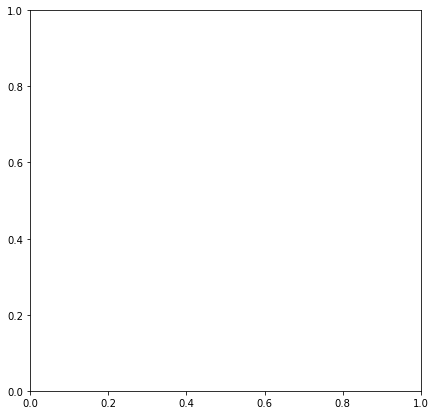

In [36]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Create a color gradient from blue to green to yellow
num_colors = df_final.index.size - 2  # Exclude the last two specific indices

# Create a smooth color gradient from blue to green to yellow
colors = np.concatenate([
    mcolors.LinearSegmentedColormap.from_list('blue_to_green_yellow', [(0, 'blue'), (0.5, 'green'), (1, 'yellow')])(np.linspace(0, 1, num_colors))
])

# Set the color for the specific indices
# colors = np.append(colors, 'blue')  # Blue for the last index
# colors = np.append(colors, 'red')   # Red for the second last index

# Plotting
fig, ax = plt.subplots(figsize=(7, 7))
for i, index in enumerate(df_final.index):
    if index == 'BBL_innital_1_01-48-25-438':
        color = 'blue'
    elif index == 'RHZ_innital_0_01-36-43-937':
        color = 'red'
    else:
        color = colors[i]
    ax.plot(df_final.columns, df_final.loc[index], color=color)

# Customize the plot
ax.set_xlabel('Wavelength')
ax.set_ylabel('Absorption')
ax.set_title('Spring 2022 St.16: rhizon pore water and BBL water Mix')
ax.set_ylim(0, 10)
ax.set_xlim(250, 600)

plt.savefig("../../../Data_Thesis/FIGS/Experiments/MIX_16_Spring")
plt.show()


In [32]:
colors

array([[0.        , 0.        , 1.        , 1.        ],
       [0.        , 0.01181084, 0.97647059, 1.        ],
       [0.        , 0.02755863, 0.94509804, 1.        ],
       [0.        , 0.04330642, 0.91372549, 1.        ],
       [0.        , 0.05905421, 0.88235294, 1.        ],
       [0.        , 0.074802  , 0.85098039, 1.        ],
       [0.        , 0.09054979, 0.81960784, 1.        ],
       [0.        , 0.10629758, 0.78823529, 1.        ],
       [0.        , 0.12204537, 0.75686275, 1.        ],
       [0.        , 0.13779316, 0.7254902 , 1.        ],
       [0.        , 0.15354095, 0.69411765, 1.        ],
       [0.        , 0.16928874, 0.6627451 , 1.        ],
       [0.        , 0.18503652, 0.63137255, 1.        ],
       [0.        , 0.20078431, 0.6       , 1.        ],
       [0.        , 0.2165321 , 0.56862745, 1.        ],
       [0.        , 0.23227989, 0.5372549 , 1.        ],
       [0.        , 0.24802768, 0.50588235, 1.        ],
       [0.        , 0.25983852,

In [ ]:
#outputs_final.to_csv('../../../TURB/data_process_output_vars.csv')